<a href="https://colab.research.google.com/github/lak28012004/lakshman282004/blob/main/Generating_Brain_MRI_Images_with_DC_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
navoneel_brain_mri_images_for_brain_tumor_detection_path = kagglehub.dataset_download('navoneel/brain-mri-images-for-brain-tumor-detection')

print('Data source import complete.')


Using Colab cache for faster access to the 'brain-mri-images-for-brain-tumor-detection' dataset.
Data source import complete.


![image.png](attachment:ac3b4c2a-412f-42d7-8635-49646f6ef58d.png)

# About Brain Tumor

<p style="font-size:20px">A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems.
Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.
Brain tumors are categorized as primary or secondary:
<ul>
    <li style="font-size:20px">A primary brain tumor originates in your brain. Many primary brain tumors are benign.</li>
    <li style="font-size:20px">A secondary brain tumor, also known as a metastatic brain tumor, occurs when cancer cells spread to your brain from another organ, such as lung or breast. </li>
</ul>
</p>

<p align="center">
<img src="https://i0.wp.com/post.healthline.com/wp-content/uploads/2022/02/2009199_Understanding-Brain-Tumors-01.jpg?w=1155&h=1887" style="width: 725px; height: 500px"/>
</p>
<br>

# How is Brain Tumor diagnosed?
<br>
<img src="https://qph.cf2.quoracdn.net/main-qimg-3cd4287f29cd7fdc7f68ab223107bb64-pjlq" style="width:700px; height:400px">
<br>

## Magnetic Resonance Imaging (MRI)
<p>
    <ul>
        <li  style="font-size:20px">An MRI uses magnetic fields to produce detailed images of the body.<br> MRI can be used to measure the tumor’s size. A special dye called a contrast medium is given before the scan to create a clearer picture.</li>
        <li  style="font-size:20px">This dye can be injected into a patient’s vein or given as a pill or liquid to swallow.<br> MRIs create more detailed pictures than CT scans and are the preferred way to diagnose a brain tumor.</li>
        <li  style="font-size:20px">The MRI may be of the brain, spinal cord, or both, depending on the type of tumor suspected and the likelihood that it will spread in the CNS.</li>
        <li  style="font-size:20px">There are different types of MRI. The results of a neuro-examination, done by the internist or neurologist, helps determine which type of MRI to use.</li>
    </ul>
</p>

# What do the Numbers Say?

<ul>
    <li style="font-size:20px">In India, every year, 40,000 - 50,000 patients are diagnosed with a brain tumor. 20 percent of them are children</li>
    <li style="font-size:20px">At the current population level of the country (1.417 billion), this means only <b>0.0035 percent</b> are diagnosed with Brain Tumor!</li>
    <li style="font-size:20px">Let's assume that all MRI scans produce 100% accurate results. This would mean that for every 10,000 MRI scans, we only get <b>35 samples</b> showing Brain Tumor versus many more that don't</li>
    <li style="font-size:20px">This, combined with other problems in accessing Medical data, would lead to Machine Learning problems such as <b>Class Imbalance</b> and <b>Bias</b></li>
</ul>

<p style="font-size:15px">Source: https://health.economictimes.indiatimes.com/news/diagnostics/brain-tumors-death-on-diagnosis/88090467</p>

# A Solution - Generative Modelling

<p style="font-size:20px">Generative models, or deep generative models, are a class of deep learning models that learn the underlying data distribution from the sample. These models can be used to reduce data into its fundamental properties, or to generate new samples of data with new and varied properties</p>

# Generative Adversarial Networks

<p style="font-size:20px">Generative adversarial networks are implicit likelihood models that generate data samples from the statistical distribution of the data. They’re used to copy variations within the dataset. They use a combination of two networks: generator and discriminator.</p>
<br>
<img src="https://miro.medium.com/v2/resize:fit:720/1*9jwIuW0KPi3THIvoYg9BUQ.png" />



## <u> The Generator: </u>
<p style="font-size:20px">A generator network takes a random normal distribution (z), and outputs a generated sample that’s close to the original distribution.</p>

## <u> The Discriminator: </u>
<p style="font-size:20px">A discriminator tries to evaluate the output generated by the generator with the original sample, and outputs a value between 0 and 1. If the value is close to 0, then the generated sample is fake, and if the value is close to 1 then the generated sample is real.</p>

## <u> What the Entire thing looks like: </u>

<br><img src="https://s3.amazonaws.com/kajabi-storefronts-production/blogs/12746/images/iAOOdduQyCICwiv31aHa_dcgan.png">

## <u> How do GANs work ? </u>

<p style="font-size:20px">A random normal distribution is fed into the generator. The generator then outputs a random distribution, since it doesn’t have a reference point. <br>
Meanwhile, an actual sample, or ground truth, is fed into the discriminator. The discriminator learns the distribution of the actual sample. When the generated sample from the generator is fed into the discriminator, it evaluates the distribution.<br>
If the distribution of the generated sample is close to the original sample, then the discriminator outputs a value close to ‘1’ = real. If both the distribution doesn’t match or they aren’t even close to each other, then the discriminator outputs a value close to ‘0’ = fake.</p>

## <u> The Minimax setting </u>

<br><img src="https://static.packt-cdn.com/products/9781789139907/graphics/bf03e5ab-69ac-424d-84a7-48ea85e616ec.png" style="width:900px; height:150px;">

<p style="font-size:20px">The answer lies in the loss function or the value function; it measures the distance between the distribution of the data generated and the distribution of the real data. Both the generator and the discriminator have their own loss functions. The generator tries to minimize the loss function while the discriminator tries to maximize.</p>

# Setup

**In this project, I have used**
* Numpy and Tensorflow for Mathematical Operations
* Matplotlib and OpenCV for Image data handling and Visualization
* Keras for the Neural Networks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os
import seaborn as sns
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, Reshape, Input, Conv2DTranspose
from keras.layers import Activation, LeakyReLU, BatchNormalization, Dropout, Resizing
from keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import VGG16

import warnings
warnings.filterwarnings('ignore')

try:
    from tensorflow.keras.optimizers import Adam
except:
    from keras.optimizers import Adam

In [ ]:
NOISE_DIM = 100
BATCH_SIZE = 4
STEPS_PER_EPOCH = 3750
EPOCHS = 10
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

# Import Adam optimizer here to resolve NameError
try:
    from tensorflow.keras.optimizers import Adam
except:
    from keras.optimizers import Adam

OPTIMIZER = Adam(0.0002, 0.5)

In [ ]:
MAIN_DIR = navoneel_brain_mri_images_for_brain_tumor_detection_path + '/yes'

# Loading and Preprocessing the Images

In [ ]:
def load_images(folder):

    imgs = []
    target = 1
    labels = []
    for i in os.listdir(folder):
        img_dir = os.path.join(folder,i)
        try:
            img = cv2.imread(img_dir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (128,128))
            imgs.append(img)
            labels.append(target)
        except:
            continue

    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [ ]:
data, labels = load_images(MAIN_DIR)
data.shape, labels.shape

((155, 128, 128), (155,))

## Generate 20 random numbers to index images from data

In [ ]:
np.random.seed(SEED)
idxs = np.random.randint(0, 155, 20)

In [ ]:
X_train = data[idxs]
X_train.shape

(20, 128, 128)

## Normalize and Reshape the Data

In [ ]:
# Normalize the Images
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

# Reshape images
X_train = X_train.reshape(-1, WIDTH,HEIGHT,CHANNELS)

# Check shape
X_train.shape

(20, 128, 128, 1)

## Plotting The Real Images

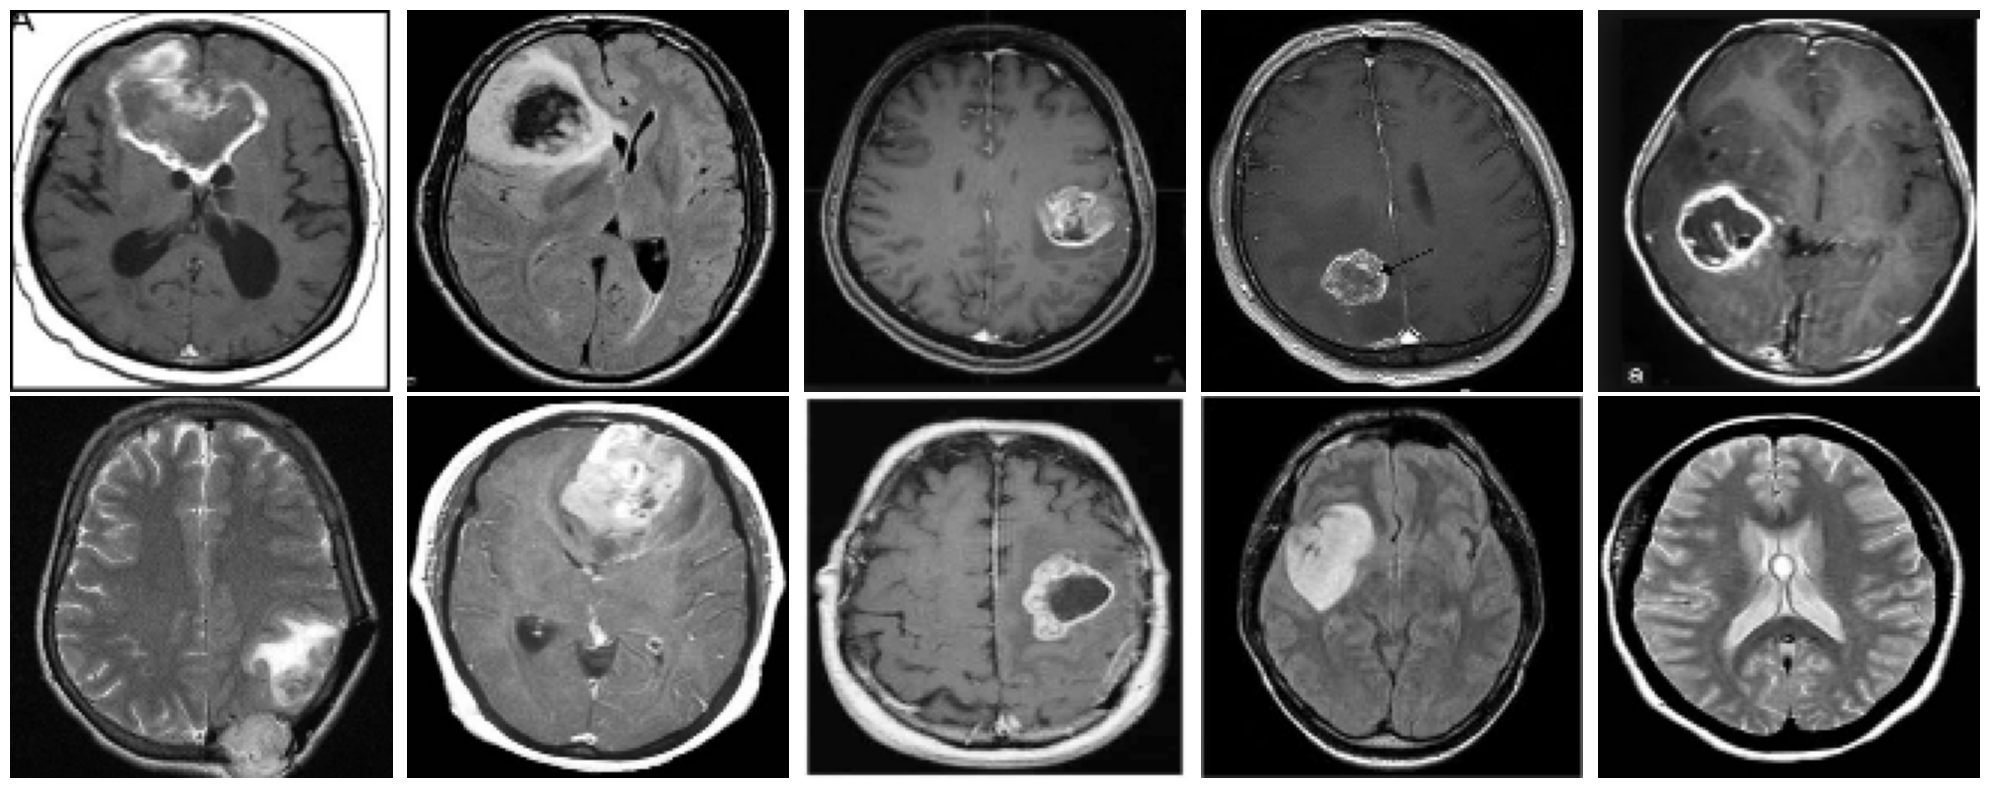

In [ ]:
plt.figure(figsize=(20,8))
for i in range(10):
    axs = plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()

# The Architecture

In [ ]:
def build_generator():

    """
        Generator model "generates" images using random noise. The random noise AKA Latent Vector
        is sampled from a Normal Distribution which is given as the input to the Generator. Using
        Transposed Convolution, the latent vector is transformed to produce an image
        We use 3 Conv2DTranspose layers (which help in producing an image using features; opposite
        of Convolutional Learning)

        Input: Random Noise / Latent Vector
        Output: Image
    """

    model = Sequential([

        Dense(32*32*256, input_dim=NOISE_DIM),
        LeakyReLU(alpha=0.2),
        Reshape((32,32,256)),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(CHANNELS, (4, 4), padding='same', activation='tanh')
    ],
    name="generator")
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)

    return model

In [ ]:
def build_discriminator():

    """
        Discriminator is the model which is responsible for classifying the generated images
        as fake or real. Our end goal is to create a Generator so powerful that the Discriminator
        is unable to classify real and fake images
        A simple Convolutional Neural Network with 2 Conv2D layers connected to a Dense output layer
        Output layer activation is Sigmoid since this is a Binary Classifier

        Input: Generated / Real Image
        Output: Validity of Image (Fake or Real)

    """

    model = Sequential([

        Conv2D(64, (3, 3), padding='same', input_shape=(WIDTH, HEIGHT, CHANNELS)),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(256, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Flatten(),
        Dropout(0.4),
        Dense(1, activation="sigmoid", input_shape=(WIDTH, HEIGHT, CHANNELS))
    ], name="discriminator")
    model.summary()
    model.compile(loss="binary_crossentropy",
                        optimizer=OPTIMIZER)

    return model

# Putting it together

In [ ]:
print('\n')
discriminator = build_discriminator()
print('\n')
generator = build_generator()

discriminator.trainable = False

gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")
gan.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)

print("The Combined Network:\n")
gan.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        65,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,785 (2.22 MB)

 Trainable params: 582,785 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 262144)         │    26,476,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 128)  │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 1)    │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,265,281 (104.01 MB)

 Trainable params: 27,265,281 (104.01 MB)

 Non-trainable params: 0 (0.00 B)

The Combined Network:



Model: "gan_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ generator (Sequential)          │ (None, 128, 128, 1)    │    27,265,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ discriminator (Sequential)      │ (None, 1)              │       582,785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,848,066 (106.23 MB)

 Trainable params: 27,265,281 (104.01 MB)

 Non-trainable params: 582,785 (2.22 MB)

In [ ]:
def sample_images(noise, subplots, figsize=(22,8), save=False):
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)

    for i, image in enumerate(generated_images):
        plt.subplot(subplots[0], subplots[1], i+1)
        if CHANNELS == 1:
            plt.imshow(image.reshape((WIDTH, HEIGHT)), cmap='gray')

        else:
            plt.imshow(image.reshape((WIDTH, HEIGHT, CHANNELS)))
        if save == True:
            img_name = "gen" + str(i)
            plt.savefig(img_name)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## The Training

In [ ]:
np.random.seed(SEED)
for epoch in range(10):
    for batch in tqdm(range(STEPS_PER_EPOCH)):

        noise = np.random.normal(0,1, size=(BATCH_SIZE, NOISE_DIM))
        fake_X = generator.predict(noise)

        idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
        real_X = X_train[idx]

        X = np.concatenate((real_X, fake_X))

        disc_y = np.zeros(2*BATCH_SIZE)
        disc_y[:BATCH_SIZE] = 1

        d_loss = discriminator.train_on_batch(X, disc_y)

        y_gen = np.ones(BATCH_SIZE)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f"EPOCH: {epoch + 1} Generator Loss: {g_loss:.4f} Discriminator Loss: {d_loss:.4f}")
    noise = np.random.normal(0, 1, size=(10,NOISE_DIM))
    sample_images(noise, (2,5))

  0%|          | 0/3750 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


  0%|          | 1/3750 [00:07<8:17:01,  7.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


  0%|          | 2/3750 [00:11<5:41:45,  5.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  0%|          | 3/3750 [00:14<4:23:21,  4.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  0%|          | 4/3750 [00:17<3:53:32,  3.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  0%|          | 5/3750 [00:20<3:39:33,  3.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


  0%|          | 6/3750 [00:24<3:44:41,  3.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  0%|          | 7/3750 [00:27<3:34:31,  3.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  0%|          | 8/3750 [00:30<3:21:51,  3.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


  0%|          | 9/3750 [00:33<3:13:45,  3.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


  0%|          | 10/3750 [00:36<3:28:10,  3.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  0%|          | 11/3750 [00:39<3:21:48,  3.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  0%|          | 12/3750 [00:42<3:18:42,  3.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  0%|          | 13/3750 [00:45<3:15:20,  3.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


  0%|          | 14/3750 [00:49<3:30:34,  3.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  0%|          | 15/3750 [00:52<3:18:35,  3.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  0%|          | 16/3750 [00:55<3:11:50,  3.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  0%|          | 17/3750 [00:58<3:09:30,  3.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  0%|          | 18/3750 [01:02<3:28:57,  3.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


  1%|          | 19/3750 [01:05<3:18:13,  3.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


  1%|          | 20/3750 [01:08<3:10:43,  3.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  1%|          | 21/3750 [01:10<3:03:59,  2.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


  1%|          | 22/3750 [01:14<3:17:51,  3.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


  1%|          | 23/3750 [01:17<3:13:37,  3.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  1%|          | 24/3750 [01:20<3:12:16,  3.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  1%|          | 25/3750 [01:23<3:11:37,  3.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  1%|          | 26/3750 [01:27<3:21:24,  3.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


  1%|          | 27/3750 [01:30<3:18:16,  3.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


  1%|          | 28/3750 [01:33<3:13:45,  3.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  1%|          | 29/3750 [01:36<3:13:10,  3.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


  1%|          | 30/3750 [01:40<3:35:50,  3.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


  1%|          | 31/3750 [01:43<3:27:07,  3.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  1%|          | 32/3750 [01:46<3:14:03,  3.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


  1%|          | 33/3750 [01:49<3:05:58,  3.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


  1%|          | 34/3750 [01:52<3:14:27,  3.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


  1%|          | 35/3750 [01:56<3:21:11,  3.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  1%|          | 36/3750 [01:58<3:15:04,  3.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  1%|          | 37/3750 [02:02<3:13:01,  3.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  1%|          | 38/3750 [02:05<3:16:19,  3.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


  1%|          | 39/3750 [02:08<3:22:51,  3.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  1%|          | 40/3750 [02:11<3:14:06,  3.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  1%|          | 41/3750 [02:14<3:07:44,  3.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


# Let's generate some images !

In [ ]:
noise = np.random.normal(0, 1, size=(100, NOISE_DIM))
sample_images(noise, (10,10), (24,20), save=True)

# Testing the Generated sample: Plotting the Distributions

<p style="font-size:20px">In this test, we compare the generated images with the real samples by plotting their distributions. If the distributions overlap, that indicates the generated samples are very close to the real ones
</p>

In [ ]:
generated_images = generator.predict(noise)
generated_images.shape

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(18,10))

sns.distplot(X_train, label='Real Images', hist=True, color='#fc0328', ax=axs)
sns.distplot(generated_images, label='Generated Images', hist=True, color='#0c06c7', ax=axs)

axs.legend(loc='upper right', prop={'size': 12})

plt.show()

# Some other testing methods

<p style="font-size:20px">
<ul>
    <li style="font-size:20px">Average Log-likelihood</li>
    <li style="font-size:20px">Inception Score</li>
    <li style="font-size:20px">Wasserstien Metric</li>
</ul>
</p>

# Conclusion

<p style="font-size:20px">
    As we can see from the plot, the distribution of Generated Images is approximately the same as that of the Real Images. From this we can conclude that the generated images are a true representative of the real ones, capturing most of the variations.
</p>